In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
# from haloclustering.data import get_combined_dataset
from scipy.stats import binned_statistic
from haloclustering import models
from haloclustering import data as datamodule
# from haloclustering.plot import CovFracPlot
from haloclustering import plot as cplot

from casbah import cgm
import matplotlib
matplotlib.rcParams['font.serif'] = "DejaVu Serif"
matplotlib.rcParams['font.family'] = "serif"

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 16
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### read in data

In [4]:
cgmsqfile = "/Users/mwilde/python/cgm-squared/cgmsquared/data/cgm/cgmsquared_cgmsurvey_aodm_vhalos10_3sigma.json"
casdir = "/Users/mwilde/Dropbox/CASBaH/data/h1_galaxies_20Mpc_500kms_*.fits"
#data_lo = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=7, M_max=9.204)
#data_mid = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.204, M_max=9.888)
#data_hi = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=9.888, M_max=17.)
data = datamodule.get_combined_dataset(cgmsqfile, casdir, M_min=7, M_max=17)


read_sets: Using set file -- 
  /Users/mwilde/python/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 1389
misses 5509
Cutting on redshift in hits/misses
Cutting on impact parameter in hits/misses
hits 268
misses 291


# Model comparison with all masses

the uncertainty here is the intrabin spread
* TODO: plot fraction of time no crossing of R21 as mass 
* ~~TODO: add 1-halo, 2-aho model to these plots~~
* ~~TODO: check rho_min comoving~~
* ~~TODO: mark uncertainty on the model by sampling from the parameters~~
* ~~TODO: try fill_between~~
* ~~TODO: add a beta_2h term to the 2h only model - detect mass dep. at large radii??~~
* ~~TODO: try fit to >2Mpc vs 5Mpc  vs 10Mpc~~



## insantiate the models with data and respective sampler

In [21]:
# bin up the covering fraction data in rho_impact
bins = np.concatenate([[0.010, 0.05], np.logspace(-1, 1.3, 15)])
bincenters = (bins[:-1] + bins[1:]) / 2
mass = data[2]

# Plot model comparison in mass bins

KeyboardInterrupt: 

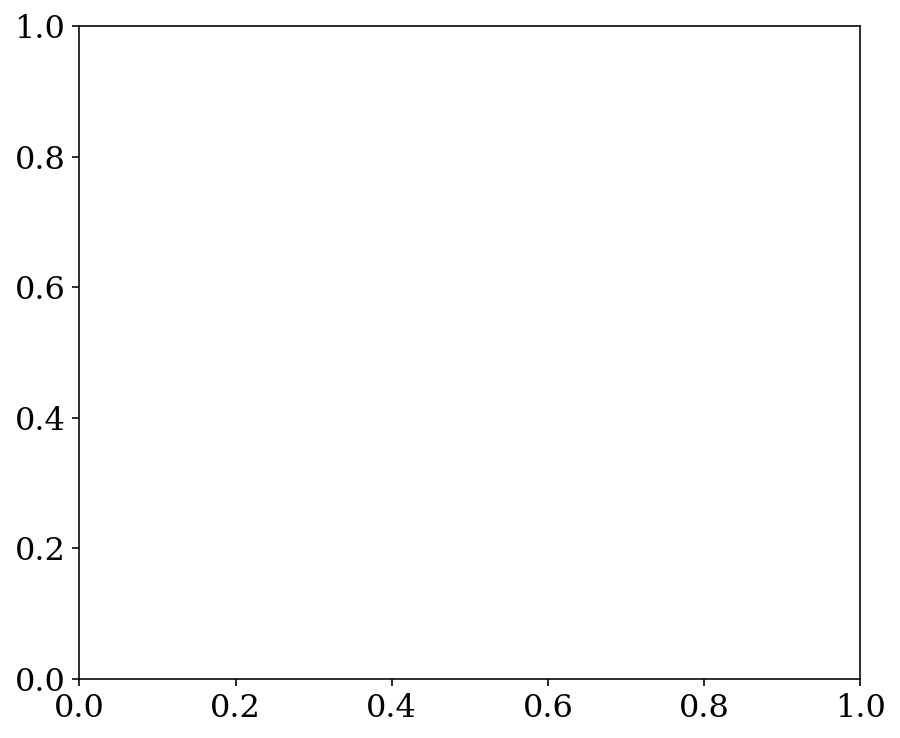

In [6]:
fig, ax = plt.subplots(figsize=(7, 6))
mass_cut_all = (mass < 10**17) & (mass > 10**7)
ax = cplot.plot_fc(ax, data, bins, "model_comparison_allmass_all_radii.png", r"All $M_{\star}$", mass_cut=mass_cut_all)

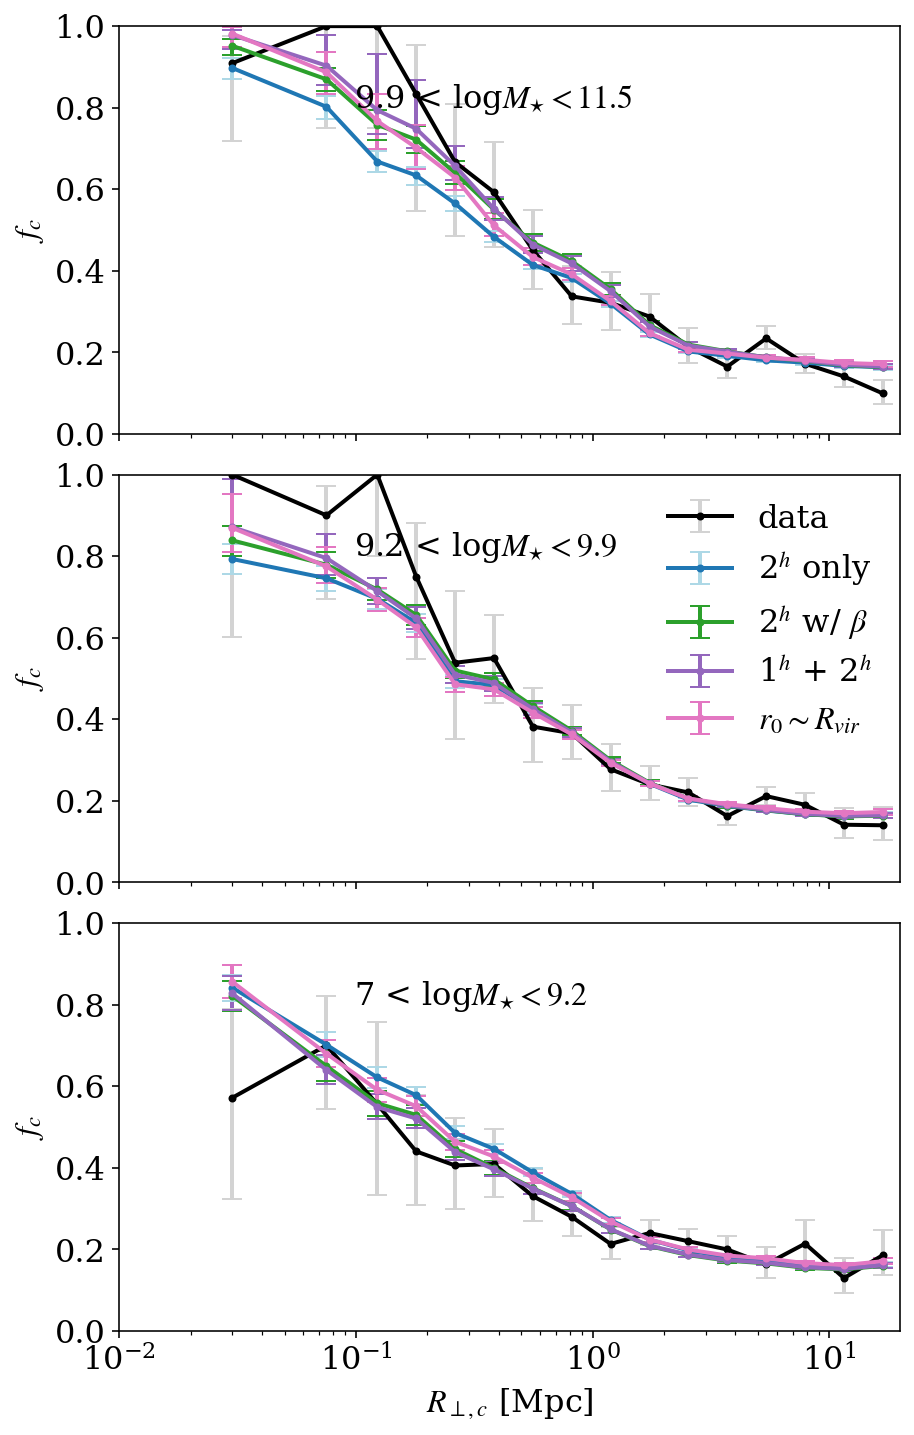

In [22]:
mass_cut_hi = mass > 10**9.888
mass_cut_mid = (mass < 10**9.888) & (mass > 10**9.204)
mass_cut_low = (mass < 10**9.204) & (mass > 10**7)
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(7, 12))
axes[0] = cplot.plot_fc(axes[0], data, bins, r"9.9 < log$M_{\star} < 11.5$", rerun_fc=False, mass_cut=mass_cut_hi)
axes[1] = cplot.plot_fc(axes[1], data, bins, r"9.2 < log$M_{\star} < 9.9$", rerun_fc=False, mass_cut=mass_cut_mid)
axes[2] = cplot.plot_fc(axes[2], data, bins, r"7 < log$M_{\star} < 9.2$", rerun_fc=False, mass_cut=mass_cut_low)
axes[1].legend(frameon=False)
axes[2].set_xlabel(r"$R_{\perp,c}$ [Mpc]")
fig.subplots_adjust(hspace=0.1)
fig.savefig("model_comparison_mass.png")


(array([1.000e+00, 4.000e+00, 1.600e+01, 2.900e+01, 3.500e+01, 6.300e+01,
        1.670e+02, 3.420e+02, 5.690e+02, 1.030e+03, 1.384e+03, 1.857e+03,
        1.293e+03, 6.650e+02]),
 array([1.00000000e-02, 1.72073616e-02, 2.96093294e-02, 5.09498438e-02,
        8.76712387e-02, 1.50859071e-01, 2.59588659e-01, 4.46683592e-01,
        7.68624610e-01, 1.32260016e+00, 2.27584593e+00, 3.91613038e+00,
        6.73862717e+00, 1.15953995e+01, 1.99526231e+01]),
 <BarContainer object of 14 artists>)

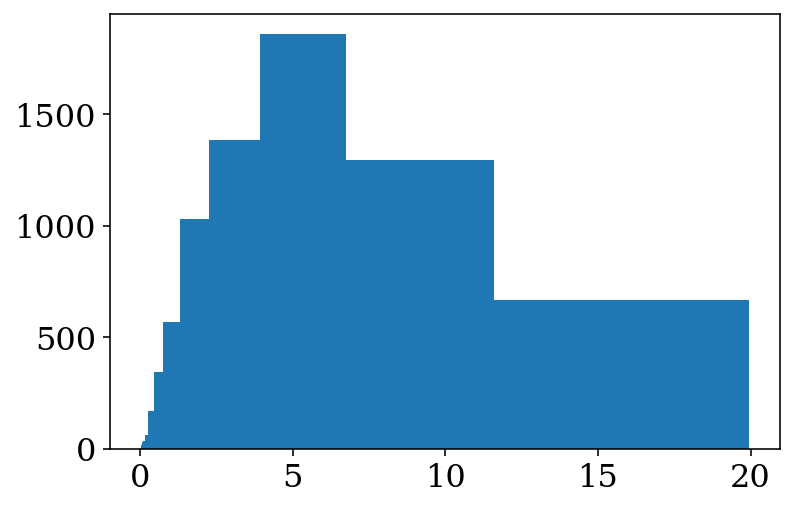

In [12]:
plt.hist(data[1], bins)

In [71]:
cf, lolim, uplim = cplot.compute_empirical_fc_bins(data, bins, mass_cut_mid)

In [72]:
cf, lolim, uplim

(array([1.        , 0.69230769, 0.51724138, 0.47058824, 0.36936937,
        0.28985507, 0.24358974, 0.19804401, 0.17914439, 0.215311  ,
        0.13278008, 0.14197531]),
 array([0.18084985, 0.19547364, 0.12764827, 0.0955599 , 0.06174723,
        0.05115227, 0.03728806, 0.02628883, 0.01890639, 0.02222069,
        0.02782953, 0.0343254 ]),
 array([0.        , 0.1444808 , 0.12543711, 0.09776577, 0.06634179,
        0.05711793, 0.04160598, 0.02920856, 0.02060652, 0.02401938,
        0.03383533, 0.04300162]))

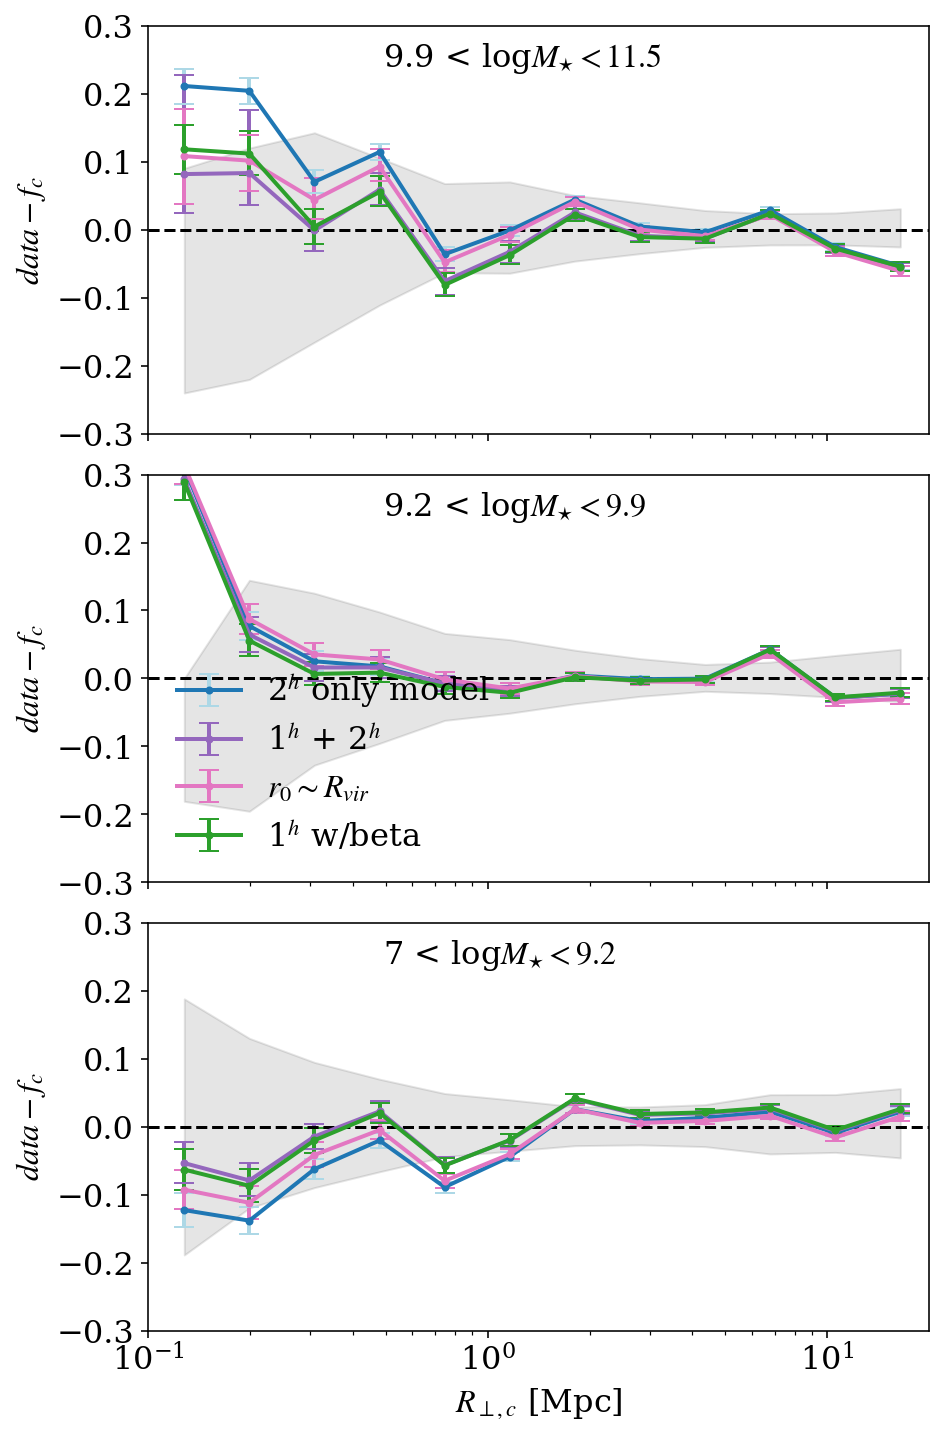

In [78]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(7, 12))
axes[0] = cplot.plot_fc_diff(axes[0], data, bins, r"9.9 < log$M_{\star} < 11.5$", rerun_fc=False, mass_cut=mass_cut_hi)
axes[1] = cplot.plot_fc_diff(axes[1], data, bins, r"9.2 < log$M_{\star} < 9.9$", rerun_fc=False, mass_cut=mass_cut_mid)
axes[2] = cplot.plot_fc_diff(axes[2], data, bins, r"7 < log$M_{\star} < 9.2$", rerun_fc=False, mass_cut=mass_cut_low)
axes[1].legend(frameon=False)
axes[2].set_xlabel(r"$R_{\perp,c}$ [Mpc]")
axes[2]
fig.subplots_adjust(hspace=0.1)


# what about adding the one and 2 halo components a la the r21 schematic?

Thoughts on this: 
* this requires computing phit_1halo, phit_2halo, in addtion to phit_sum, then doing this binned statistic as a function of $R_{\perp}$
* maybe better to do this with grid data instead of the real data 
* these all could be aided by computing the covering fraction for the data as part of the model, like `Model.calc_phit(data)`
* dont I already do this?

In [80]:
np.log10(mass).max()

11.32591037921554